## Logistic Regression
-  https://www.andrewvillazon.com/logistic-regression-python-statsmodels/
-  https://www.javatpoint.com/logistic-regression-in-machine-learning
-  Predict a category (0/1, Yes/No) on the basis of IVs (which can be continous or categories)
-  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
-  Predict Y (Dependent Variable) on the basis of Xs (Independent Variables)
-  Y : Category Value (0 or 1)
-  Xs : can be continous or discrete eg. gender, age, salary, experience in yrs etc
-  In this mtcars data set : Y (am/ tx) predict on the basis of Xs (wt, hp, mpg)
-  Steps
    -  from sklearn.linear_model import LogisticRegression
    -  model = LogisticRegression().fit(X,y)
    -  r_sq = model.score(X, y)
    -  y_pred = model.predict(X)
    -  Y_pred(new) = model.predict(X new)
 -  Two Libraries - sklearn and statsmodels
     -  logreg1 - sklearn
     -  logreg2 - statsmodel

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [2]:
#data
mt = data('mtcars')
print(mt.shape, mt.columns,'\n')
print(mt.dtypes, '\n', mt[['mpg','wt','hp','gear']].head())

(32, 11) Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object') 

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object 
                     mpg     wt   hp  gear
Mazda RX4          21.0  2.620  110     4
Mazda RX4 Wag      21.0  2.875  110     4
Datsun 710         22.8  2.320   93     4
Hornet 4 Drive     21.4  3.215  110     3
Hornet Sportabout  18.7  3.440  175     3


In [3]:
from sklearn.model_selection import train_test_split  #split

In [4]:
#additional libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
#seaborn to create confusion matrix

In [5]:
data2 = mt[['am','wt', 'hp','mpg']]
X = data2.drop(columns='am')
y = data2.am
print(X.shape, y.shape)

(32, 3) (32,)


In [6]:
data2.head()

,am,wt,hp,mpg
Mazda RX4,1,2.620,110,21.0
Mazda RX4 Wag,1,2.875,110,21.0
Datsun 710,1,2.320,93,22.8
Hornet 4 Drive,0,3.215,110,21.4
Hornet Sportabout,0,3.440,175,18.7


In [7]:
mt.am.value_counts()

am
0    19
1    13
Name: count, dtype: int64

In [8]:
#ogreg1 = LogisticRegression(solver='liblinear', random_state=123).fit(X,y)
logreg1 = LogisticRegression(random_state=123).fit(X,y)

In [9]:
print(' Classes ', logreg1.classes_, ' : Coeff ', logreg1.coef_, ' : Intercept ', logreg1.intercept_)
print(data2.columns)

 Classes  [0 1]  : Coeff  [[-1.43352673  0.04286737  0.83179644]]  : Intercept  [-18.80155606]
Index(['am', 'wt', 'hp', 'mpg'], dtype='object')


In [10]:
newData2 = data2.sample(10)
newData2

,am,wt,hp,mpg
Camaro Z28,0,3.840,245,13.3
Datsun 710,1,2.320,93,22.8
Mazda RX4 Wag,1,2.875,110,21.0
Hornet 4 Drive,0,3.215,110,21.4
Merc 450SL,0,3.730,180,17.3
Fiat 128,1,2.200,66,32.4
Fiat X1-9,1,1.935,66,27.3
Toyota Corona,0,2.465,97,21.5
Mazda RX4,1,2.620,110,21.0
Valiant,0,3.460,105,18.1


In [11]:
logreg1.predict_proba(newData2.drop(columns='am'))

array([[9.39397332e-01, 6.06026678e-02],
       [3.04854517e-01, 6.95145483e-01],
       [6.76954111e-01, 3.23045889e-01],
       [7.09815802e-01, 2.90184198e-01],
       [8.85177951e-01, 1.14822049e-01],
       [3.99803921e-04, 9.99600196e-01],
       [1.86724123e-02, 9.81327588e-01],
       [5.72838283e-01, 4.27161717e-01],
       [5.92487891e-01, 4.07512109e-01],
       [9.85298119e-01, 1.47018813e-02]])

In [12]:
logreg1.predict(newData2.drop(columns='am'))

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [13]:
logreg1.predict_proba(X)[1:5]
#predict probabilities of each row value of X

array([[0.67695411, 0.32304589],
       [0.30485452, 0.69514548],
       [0.7098158 , 0.2901842 ],
       [0.66295804, 0.33704196]])

In [45]:
y_predLG1 = logreg1.predict(X)
print('Predicted values of AM (Y) from IV (wt, mpg, hp) : ', y_predLG1.tolist())
#predict class (0 or 1)

Predicted values of AM (Y) from IV (wt, mpg, hp) :  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]


In [46]:
logreg1.score(X,y)
#9 times out of 10, model predicts right category

0.90625

In [47]:
logreg1.predict(newData2.drop(columns='am', axis=1))

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [48]:
#check accuracy of the model
confusion_matrix(y, y_predLG1)

array([[19,  0],
       [ 3, 10]], dtype=int64)

In [49]:
pd.concat([y.reset_index(), pd.Series(y_predLG1)],axis=1, ignore_index=True).head(10)

,0,1,2
0,Mazda RX4,1,0
1,Mazda RX4 Wag,1,0
2,Datsun 710,1,1
3,Hornet 4 Drive,0,0
4,Hornet Sportabout,0,0
5,Valiant,0,0
6,Duster 360,0,0
7,Merc 240D,0,0
8,Merc 230,0,0
9,Merc 280,0,0


<Axes: >

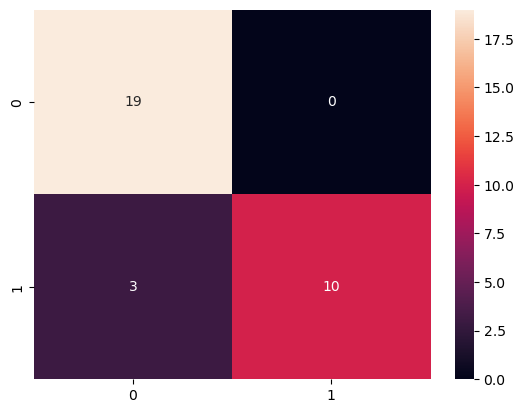

In [50]:
cm = confusion_matrix(y, y_predLG1)
cm
sns.heatmap(cm, annot=True)

In [51]:
(19 + 10)/32

0.90625

In [52]:
clsreport = classification_report(y,y_predLG1)
print('Classification Report : \n', clsreport)

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      0.77      0.87        13

    accuracy                           0.91        32
   macro avg       0.93      0.88      0.90        32
weighted avg       0.92      0.91      0.90        32



# Stats Model
-  https://www.statsmodels.org/stable/discretemod.html

In [53]:
#import statsmodels.api as sm
print(data2.shape, X.shape, y.shape)

(32, 4) (32, 3) (32,)


In [54]:
import statsmodels.formula.api as smf

In [55]:
logreg2 = smf.logit("am ~ wt + mpg + hp", data=data2).fit()

Optimization terminated successfully.
         Current function value: 0.136970
         Iterations 11


In [56]:
print(logreg2.summary())

                           Logit Regression Results                           
Dep. Variable:                     am   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Jul 2023   Pseudo R-squ.:                  0.7972
Time:                        19:23:13   Log-Likelihood:                -4.3831
converged:                       True   LL-Null:                       -21.615
Covariance Type:            nonrobust   LLR p-value:                 1.581e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.7214     40.003     -0.393      0.694     -94.125      62.683
wt            -6.9549      3.353     -2.074      0.038     -13.527      -0.383
mpg            1.2293      1.581      0.778      0.4

In [57]:
print(logreg2.params)

Intercept   -15.721371
wt           -6.954924
mpg           1.229302
hp            0.083893
dtype: float64


In [58]:
print(dir(logreg2))  #functions available

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_in_cache', '_get_endog_name', '_get_robustcov_results', '_get_wald_nonlinear', '_transform_predict_exog', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'converged', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_distribution', 'get_influence', 'get_margeff', 'get_prediction', 'im_ratio', 'info_criteria', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'method', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generali

In [59]:
y_predLG2 = logreg2.predict(X).round(2)
print(y_predLG2.tolist())

[0.75, 0.34, 0.98, 0.07, 0.12, 0.0, 0.08, 0.06, 0.16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.85, 0.0, 0.0, 0.0, 0.02, 1.0, 1.0, 1.0, 0.98, 0.98, 1.0, 0.6]


In [60]:
print(type(y), type(y_predLG2))
pd.concat([y, y_predLG2], axis=1).head()

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


,am,0
Mazda RX4,1,0.75
Mazda RX4 Wag,1,0.34
Datsun 710,1,0.98
Hornet 4 Drive,0,0.07
Hornet Sportabout,0,0.12


In [61]:
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score

In [62]:
log_loss(y, y_predLG2)

0.1367269573716344

In [63]:
print('Log loss = {:.5f}'.format(log_loss(y, y_predLG2)))
print('AUC = {:.5f}'.format(roc_auc_score(y, y_predLG2)))
print('Average Precision = {:.5f}'.format(average_precision_score(y, y_predLG2)))

Log loss = 0.13673
AUC = 0.98785
Average Precision = 0.98218


In [64]:
#try this exercise 
# https://heds.nz/posts/logistic-regression-python/
# https://www.justintodata.com/logistic-regression-example-in-python/

### end here